#### Movie Analysis
**Aim** 
1. **Movie performance**
- Identify top performance 
- Performance trends 
2. **Content Strategy**
- Language & market focus 
3. **Release Strategy Optimization**
- Optimal release windows


#### Import Libraries

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   

### Importing Dataset

In [60]:
moviess = pd.read_csv('top_rated_movies.csv')
movies = pd.DataFrame(moviess)

#### Data Profiling

In [61]:
movies.head()

,Unnamed: 0,id,original_language,title,overview,popularity,release_date,vote_average,vote_count
0,0,278,en,The Shawshank Redemption,Imprisoned in the 1940s for the double murder ...,197.019,1994-09-23,8.706,26755
1,1,238,en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",154.211,1972-03-14,8.690,20302
2,2,240,en,The Godfather Part II,In the continuing saga of the Corleone crime f...,109.117,1974-12-20,8.574,12243
3,3,424,en,Schindler's List,The true story of how businessman Oskar Schind...,90.053,1993-12-15,8.565,15658
4,4,389,en,12 Angry Men,The defense and the prosecution have rested an...,72.296,1957-04-10,8.545,8485


In [62]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9610 entries, 0 to 9609
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         9610 non-null   int64  
 1   id                 9610 non-null   int64  
 2   original_language  9610 non-null   object 
 3   title              9610 non-null   object 
 4   overview           9608 non-null   object 
 5   popularity         9610 non-null   float64
 6   release_date       9610 non-null   object 
 7   vote_average       9610 non-null   float64
 8   vote_count         9610 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 675.8+ KB


In [63]:
movies.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count
count,9610.000000,9.610000e+03,9610.000000,9610.000000,9610.000000
mean,4804.500000,1.934579e+05,30.476425,6.633975,1975.752549
std,2774.312377,2.563080e+05,54.623965,0.784036,3121.136715
min,0.000000,2.000000e+00,0.024000,2.185000,300.000000
25%,2402.250000,1.012625e+04,15.606000,6.109250,466.000000
50%,4804.500000,3.725200e+04,21.715500,6.659000,842.000000
75%,7206.750000,3.512672e+05,32.586250,7.200000,1968.750000
max,9609.000000,1.226578e+06,3094.232000,8.706000,36235.000000


In [97]:
movies.shape

(9610, 10)

In [98]:
movies.columns

Index(['id', 'original_language', 'title', 'popularity', 'release_date',
       'vote_average', 'vote_count', 'weighted_rating', 'release_year',
       'release_month'],
      dtype='object')

### Data Cleaning

#### Handling duplicates

In [64]:
# checking for duplicates
movies.duplicated().sum()

0

#### Handling missing values

In [65]:
#checking for missing values
movies.isna().sum()

Unnamed: 0           0
id                   0
original_language    0
title                0
overview             2
popularity           0
release_date         0
vote_average         0
vote_count           0
dtype: int64

#### Dropping Irrelevant Data

In [66]:
# dropping irrelevant columns from the dataset
movies.drop( columns=['Unnamed: 0', 'overview'], inplace=True)

In [67]:
#confirming the changes
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9610 entries, 0 to 9609
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 9610 non-null   int64  
 1   original_language  9610 non-null   object 
 2   title              9610 non-null   object 
 3   popularity         9610 non-null   float64
 4   release_date       9610 non-null   object 
 5   vote_average       9610 non-null   float64
 6   vote_count         9610 non-null   int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 525.7+ KB


In [68]:
# confirming the changes
movies.head()

,id,original_language,title,popularity,release_date,vote_average,vote_count
0,278,en,The Shawshank Redemption,197.019,1994-09-23,8.706,26755
1,238,en,The Godfather,154.211,1972-03-14,8.690,20302
2,240,en,The Godfather Part II,109.117,1974-12-20,8.574,12243
3,424,en,Schindler's List,90.053,1993-12-15,8.565,15658
4,389,en,12 Angry Men,72.296,1957-04-10,8.545,8485


#### Data Standardization

In [69]:
# converting the 'release_date' column to datetime format
movies['release_date'] = pd.to_datetime(movies['release_date'], format='%Y-%m-%d')

In [70]:
# coverting the 'original_language' column to uppercase 
movies['original_language'] = movies['original_language'].str.upper()

In [71]:
movies

,id,original_language,title,popularity,release_date,vote_average,vote_count
0,278,EN,The Shawshank Redemption,197.019,1994-09-23,8.706,26755
1,238,EN,The Godfather,154.211,1972-03-14,8.690,20302
2,240,EN,The Godfather Part II,109.117,1974-12-20,8.574,12243
3,424,EN,Schindler's List,90.053,1993-12-15,8.565,15658
4,389,EN,12 Angry Men,72.296,1957-04-10,8.545,8485
...,...,...,...,...,...,...,...
9605,12142,EN,Alone in the Dark,13.863,2005-01-28,3.250,598
9606,13805,EN,Disaster Movie,32.576,2008-08-29,3.179,1015
9607,11059,EN,House of the Dead,15.583,2003-04-11,3.129,379
9608,14164,EN,Dragonball Evolution,39.578,2009-03-12,2.894,2012


### Feature Engineering (Adding New Columns)


In [72]:
movies['weighted_rating'] = movies['vote_average'] * movies['vote_count']

In [73]:
# new column 'weighted_rating' is added to the dataset
movies.head()

,id,original_language,title,popularity,release_date,vote_average,vote_count,weighted_rating
0,278,EN,The Shawshank Redemption,197.019,1994-09-23,8.706,26755,232929.030
1,238,EN,The Godfather,154.211,1972-03-14,8.690,20302,176424.380
2,240,EN,The Godfather Part II,109.117,1974-12-20,8.574,12243,104971.482
3,424,EN,Schindler's List,90.053,1993-12-15,8.565,15658,134110.770
4,389,EN,12 Angry Men,72.296,1957-04-10,8.545,8485,72504.325


#### New Dataset

In [ ]:
# Save to CSV 
movies.to_csv("movies.csv", index=False)

### Exploratory Data Analysis (EDA)

##### 1.General Overview

In [74]:
#How many unique movies are in the dataset?
unique_movies = movies['title'].nunique()
print(f"Number of unique movies: {unique_movies}")

Number of unique movies: 9263


In [75]:
#What is the time range of the movies (oldest and newest release_date)?
oldest_movie = movies['release_date'].min()
newest_movie = movies['release_date'].max()
print(f"time range of the movies: {oldest_movie} to {newest_movie}")

time range of the movies: 1902-04-17 00:00:00 to 2024-08-15 00:00:00


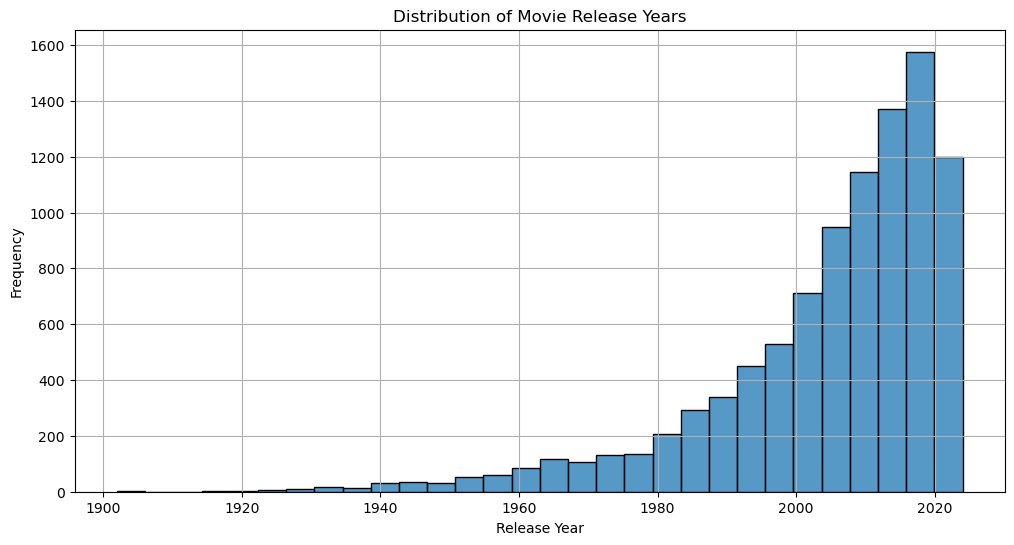

In [76]:
# what is the distribution of movie release years?
plt.figure(figsize=(12, 6))
sns.histplot(movies['release_date'].dt.year, bins=30, kde=False)
plt.title('Distribution of Movie Release Years')
plt.xlabel('Release Year')  
plt.ylabel('Frequency')
plt.grid(True)


plt.savefig('movies_released_per_year.png')
plt.show()

 According to the graph above :
 - **Pre 2000:** Gradual increase of movie production 
 - **2000-2020:** There is rapid growth of movie production majorly due to digital globalization
 - **2020-Present:** There is a notable decline of movie production potenitally influenced by market saturation

##### 2.Rating analysis

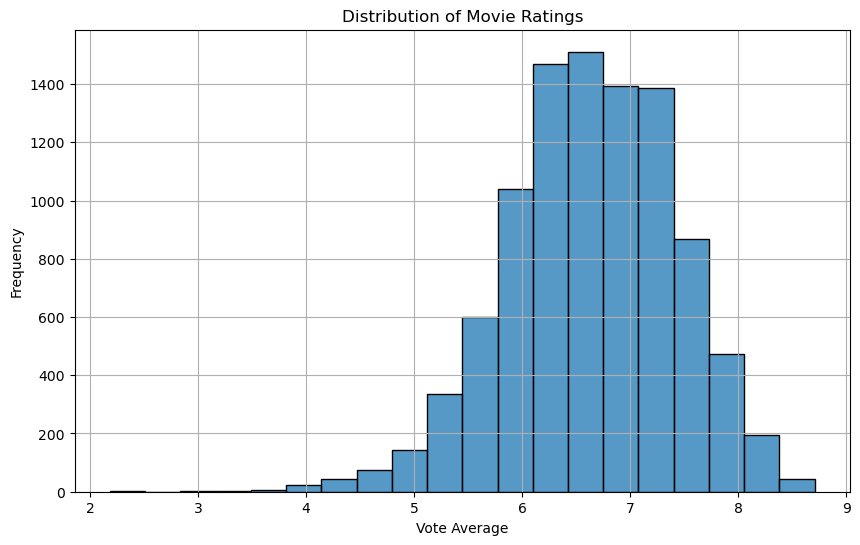

In [95]:
#What is the distribution of movie ratings? (Mostly high/low?)

plt.figure(figsize=(10, 6))
sns.histplot(movies['vote_average'], bins=20, kde=False)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Vote Average')
plt.ylabel('Frequency')
plt.grid(True)


plt.savefig('distribution_of_movie_ratings.png')

plt.show()

According to the graph above:
- most movies are rated between 6 and 7.5
- there are less highly rated movies than very low rated movies

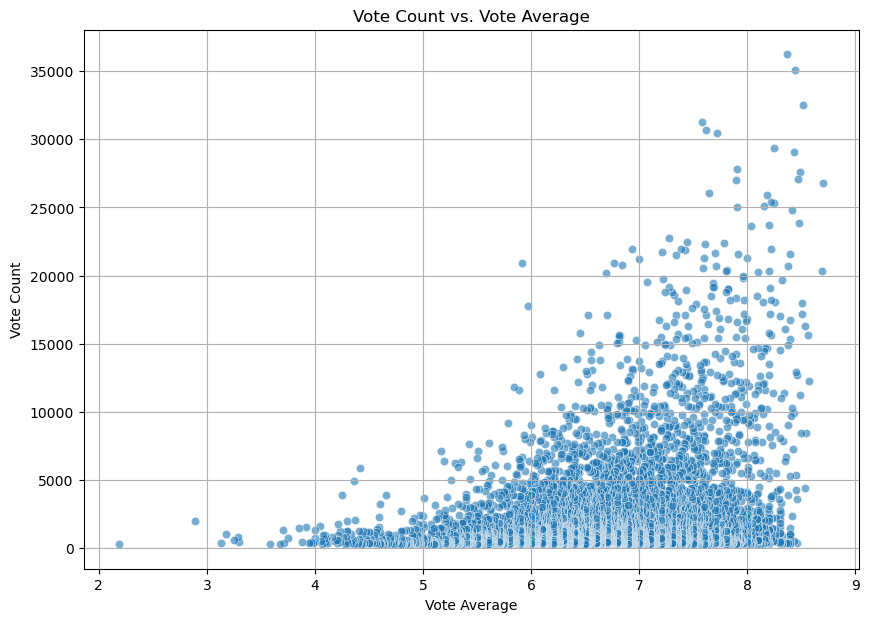

In [103]:
#Is there a correlation between vote_average and vote_count? (Do highly voted movies have higher ratings?)
plt.figure(figsize=(10, 7))
sns.scatterplot(data=movies, x='vote_average', y='vote_count', alpha=0.6)
plt.title('Vote Count vs. Vote Average')    
plt.xlabel('Vote Average')
plt.ylabel('Vote Count')
plt.grid(True)


plt.savefig('vote_count_vs_vote_average.png')

plt.show()

According to the graph above:
- There is __high density__ of movies with __below 5000__ vote count indicating __low audience engagement__ likely due __limited market__
- Increase of vote count __(>10,000)__ decreases the density of points as fewer movies achieve extremely high numbers of votes giving an implication of mainstream succeess is rare  

In [79]:
#What are the top 5 highest and lowest-rated movies? (Are low-rated movies due to few votes?)
top_5_highest_rated = movies.nlargest(5, 'vote_average')
top_5_lowest_rated = movies.nsmallest(5, 'vote_average')
print("Top 5 Highest Rated Movies:")
print(top_5_highest_rated[['title', 'vote_average', 'vote_count']])
print("\nTop 5 Lowest Rated Movies:")   
print(top_5_lowest_rated[['title', 'vote_average', 'vote_count']])

Top 5 Highest Rated Movies:
                      title  vote_average  vote_count
0  The Shawshank Redemption         8.706       26755
1             The Godfather         8.690       20302
2     The Godfather Part II         8.574       12243
3          Schindler's List         8.565       15658
4              12 Angry Men         8.545        8485

Top 5 Lowest Rated Movies:
                           title  vote_average  vote_count
9609  Birdemic: Shock and Terror         2.185         330
9608        Dragonball Evolution         2.894        2012
9607           House of the Dead         3.129         379
9606              Disaster Movie         3.179        1015
9605           Alone in the Dark         3.250         598


##### 3.Popularity Insights

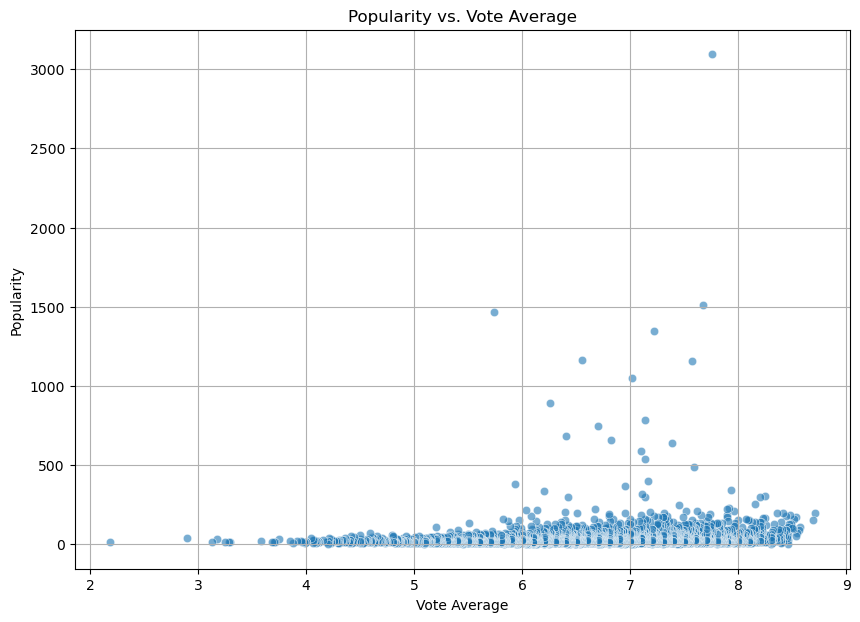

In [80]:
# How does popularity correlate with vote_average?

plt.figure(figsize=(10, 7))
sns.scatterplot(data=movies, x='vote_average', y='popularity', alpha=0.6)
plt.title('Popularity vs. Vote Average')    
plt.xlabel('Vote Average')
plt.ylabel('Popularity')
plt.grid(True)

 
plt.savefig('popularity_vs_vote_average.png') 

plt.show()

According to the graph above:
- popularity in the mainstream in very rare
- highly popular movies have an above vote average

In [81]:
# Are there movies with high popularity but low ratings (or vice versa)?
# checking data ranges
max_popularity = movies['popularity'].max()
min_popularity = movies['popularity'].min()
mean_popularity = movies['popularity'].mean()
max_vote_average = movies['vote_average'].max()
min_vote_average = movies['vote_average'].min()
mean_vote_average = movies['vote_average'].mean()
print(f"Max Popularity: {max_popularity}, Min Popularity: {min_popularity}, Mean Popularity: {mean_popularity}")
print(f"Max Vote Average: {max_vote_average}, Min Vote Average: {min_vote_average}, Mean Vote Average: {mean_vote_average}")


Max Popularity: 3094.232, Min Popularity: 0.024, Mean Popularity: 30.476425286160254
Max Vote Average: 8.706, Min Vote Average: 2.185, Mean Vote Average: 6.6339754422476584


In [82]:
#checking for movies with high popularity but low ratings
low_popularity_high_rating = movies[(movies['popularity'] > mean_popularity + 100) & (movies['vote_average'] < mean_vote_average)]
print("Movies with high popularity but low ratings:")
print(low_popularity_high_rating[['title', 'popularity', 'vote_average']])

Movies with high popularity but low ratings:
                                     title  popularity  vote_average
5272                                  Trap    1166.020         6.551
5466                          The Watchers     194.164         6.508
5915                      30 Days of Night     295.439         6.421
5926                             No Way Up     151.154         6.400
5935                              MaXXXine     203.004         6.400
5986                              Jackpot!     682.012         6.405
6164                                  Wish     142.539         6.362
6642                             The Union     890.733         6.253
6721                              Pleasure     335.102         6.200
7133                       Alien: Covenant     214.949         6.135
7164  Rebel Moon - Part Two: The Scargiver     146.352         6.127
7373                           The Marvels     180.832         6.079
7525                           Under Paris     217.964    

In [83]:
# movies with low popularity but high ratings
low_popularity_high_rating = movies[(movies['popularity'] < mean_popularity - 10) & (movies['vote_average'] > mean_vote_average + 1.5)]
print("Movies with low popularity but high ratings:")
print(low_popularity_high_rating[['title', 'popularity', 'vote_average']])

Movies with low popularity but high ratings:
                                          title  popularity  vote_average
18                       Grave of the Fireflies       0.070         8.456
27                            Gabriel's Inferno      16.371         8.416
30                     Dou kyu sei – Classmates      19.182         8.400
33                    Primal: Tales of Savagery      15.943         8.400
34                                 A Dog's Will      15.576         8.400
37                   Gabriel's Inferno: Part II       9.006         8.400
49        Taylor Swift: Reputation Stadium Tour      18.879         8.357
52                     The Silence of the Lambs      20.395         8.349
59                           Hotarubi no Mori e       0.024         8.300
63                           Dedicated to my ex      10.266         8.309
71                                  City Lights      16.614         8.300
73                                      Le Trou      18.050        

##### 4.Language and Regional Trends

In [84]:
# Which languages dominate the dataset? 
# top ten languages
movies['original_language'].value_counts().head(10)

original_language
EN    7623
FR     617
IT     345
JA     265
ES     174
DE      89
KO      83
ZH      59
CN      54
RU      45
Name: count, dtype: int64

In [85]:
# least common languages
movies['original_language'].value_counts().tail(10)

original_language
TN    1
LA    1
SH    1
ET    1
BS    1
BN    1
GA    1
RO    1
GL    1
LT    1
Name: count, dtype: int64

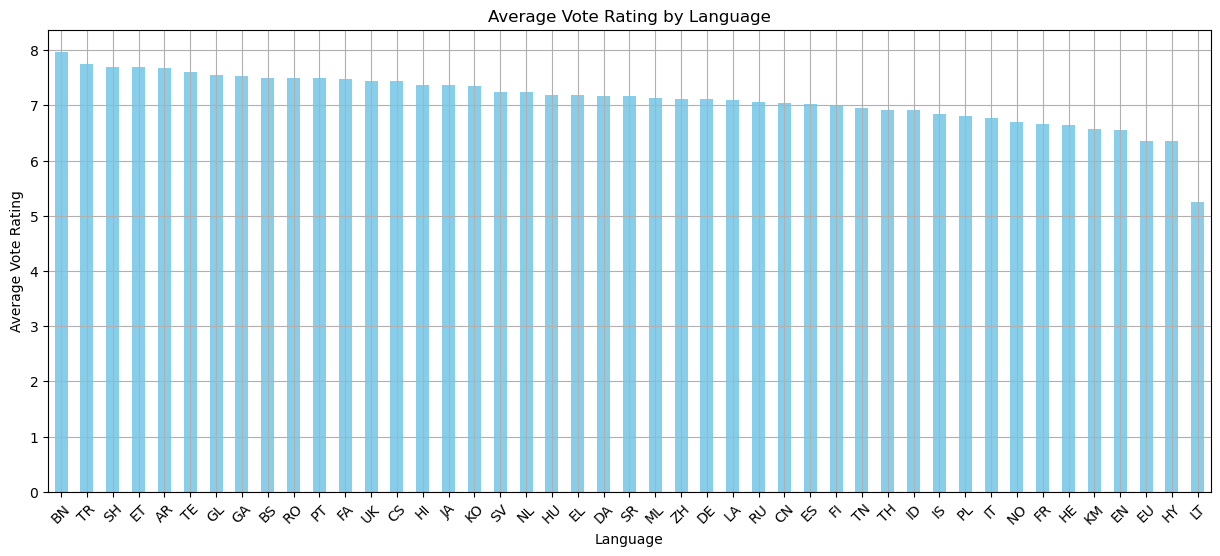

In [86]:
# Do movies in certain languages have higher average ratings?
language_rating = movies.groupby('original_language')['vote_average'].mean().sort_values(ascending=False)
plt.figure(figsize=(15, 6))
language_rating.plot(kind='bar', color='skyblue')
plt.title('Average Vote Rating by Language')
plt.xlabel('Language')  
plt.ylabel('Average Vote Rating')
plt.xticks(rotation=45)
plt.grid(True)


plt.savefig('average_vote_rating_by_language.png')

plt.show()


According to the graph above:


##### 5.Time-Based Trends

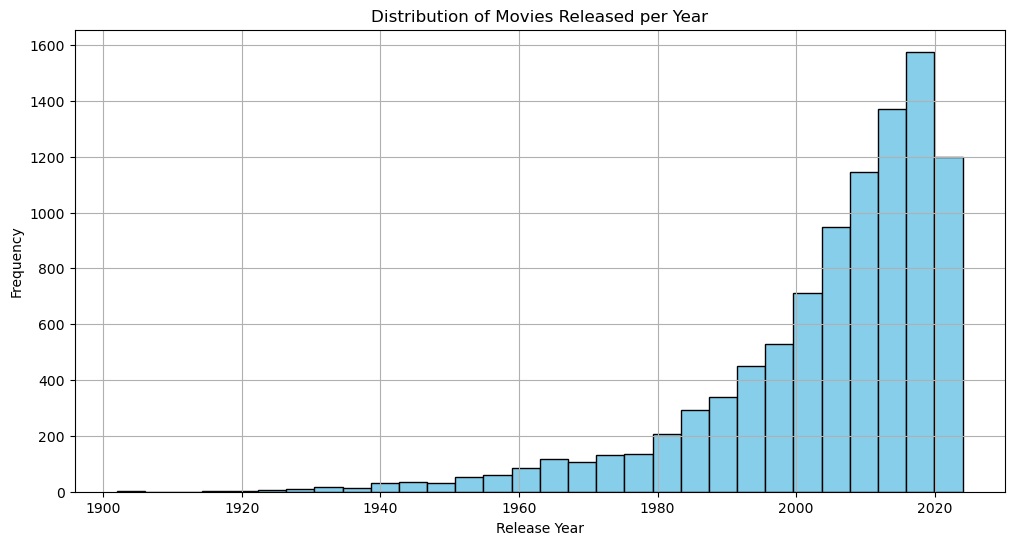

In [87]:
# How has the number of movies released per year changed over time?
plt.figure(figsize=(12, 6))
movies['release_year'] = movies['release_date'].dt.year
plt.hist(movies['release_year'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Movies Released per Year')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.grid(True)


plt.savefig('movies_released_per_year.png')

plt.show()

 According to the graph above :
 - **Pre 2000:** Gradual increase of movie production 
 - **2000-2020:** There is rapid growth of movie production majorly due to digital globalization
 - **2020-Present:** There is a notable decline of movie production potenitally influenced by market saturation

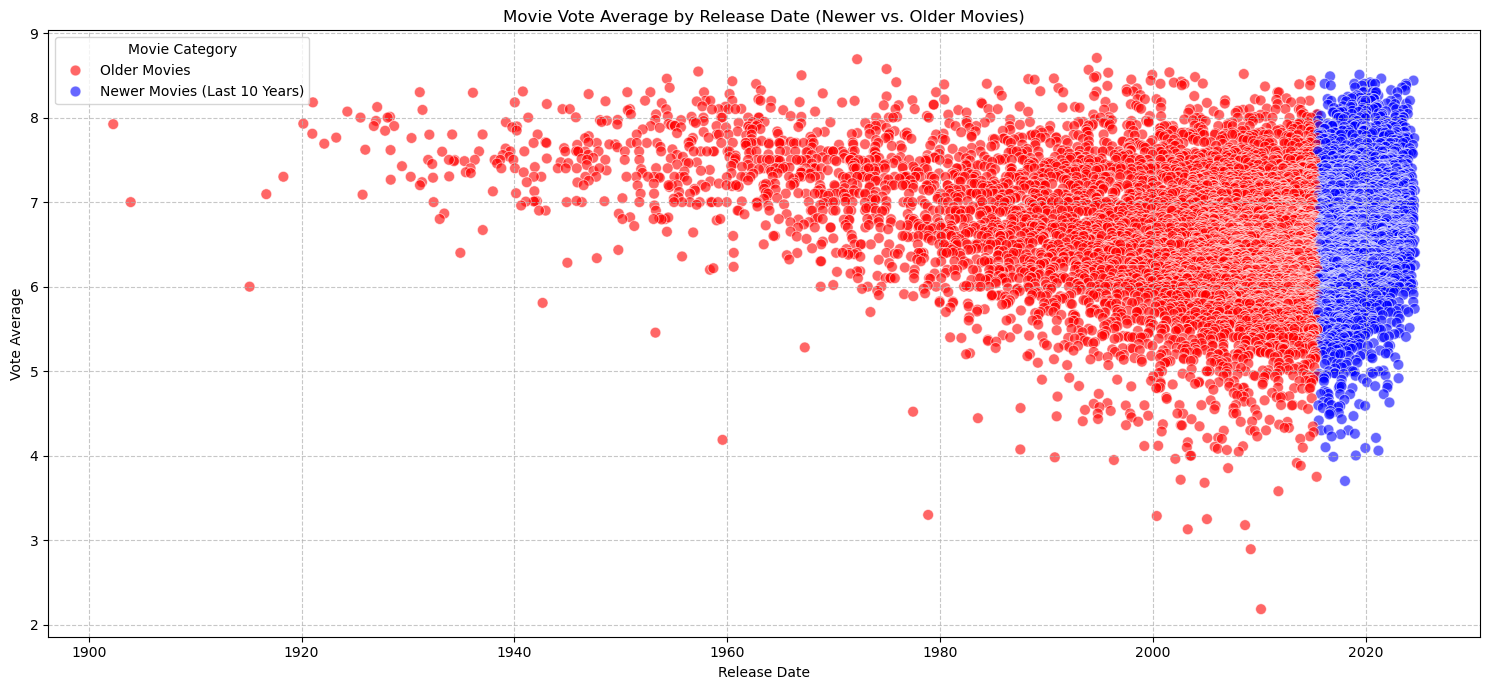

In [88]:
# Are newer movies (release_date in the last 10 years) rated higher than older ones?
plt.figure(figsize=(15, 7))
sns.scatterplot(
    data=movies,
    x='release_date',
    y='vote_average',
    hue=movies['release_date'].apply(lambda x: 'Newer Movies (Last 10 Years)' if x >= pd.Timestamp.now() - pd.DateOffset(years=10) else 'Older Movies'),
    palette={'Newer Movies (Last 10 Years)': 'blue', 'Older Movies': 'red'},
    s=60, # Size of the points
    alpha=0.6 # Transparency of the points
)

plt.title('Movie Vote Average by Release Date (Newer vs. Older Movies)')
plt.xlabel('Release Date')
plt.ylabel('Vote Average')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Movie Category')
plt.tight_layout()

# Save the chart as a PNG file
plt.savefig('movie_ratings_scatter_plot.png')

plt.show()


 **Key Findings from the graph above**  
- **Older films** show broader rating variance, while **newer films** cluster mid-range (5–7).  
- **Top-rated films (8+)** appear sporadically across all eras—potential candidates for "timeless" classics.  


In [89]:
# Is there a seasonality effect? (More releases in summer/December?)
# Extracting month from release_date
movies['release_month'] = movies['release_date'].dt.month
# Counting the number of movies released in each month
monthly_releases = movies['release_month'].value_counts().sort_index()
monthly_releases

release_month
1      567
2      715
3      791
4      678
5      655
6      767
7      744
8      821
9     1057
10    1008
11     792
12    1015
Name: count, dtype: int64

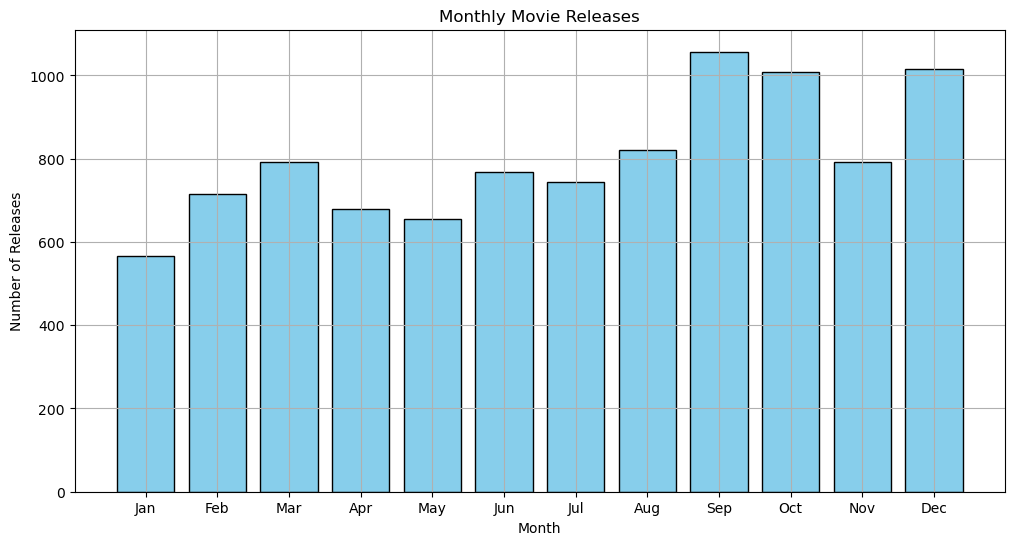

In [90]:
# histogram of monthly releases
plt.figure(figsize=(12, 6))
plt.bar(monthly_releases.index, monthly_releases.values, color='skyblue', edgecolor='black')
plt.title('Monthly Movie Releases')
plt.xlabel('Month')
plt.ylabel('Number of Releases')
plt.xticks(monthly_releases.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)


# saving the chart as a PNG file
plt.savefig('monthly_movie_releases.png')

plt.show()

**Monthly Trends**
- **Peak Release:** The highest number of movie releases occur in the latter half of the year, particularly **September, October, and December**, each seeing __over 1000__ new releases.
- **Lowest Release :** January consistently has the fewest releases (around 570), followed by April and May.
- **General Trend:** Releases generally build up from July onwards, __peaking__ in the autumn and holiday seasons, then dip significantly at the start of the new year.

##### 6.Outliers and anomalies

In [91]:
# Are there movies with extremely high vote_count but low vote_average (controversial films)?
controversial_movies = movies[(movies['vote_count'] > (movies['vote_count'].mean())) & (movies['vote_average'] < mean_vote_average - 1.5)]
controversial_movies[['title','release_date', 'vote_count', 'vote_average']].sort_values(by='vote_count', ascending=False)

,title,release_date,vote_count,vote_average
9539,Fantastic Four,2015-08-05,5900,4.417
9548,Batman & Robin,1997-06-20,4913,4.361
9485,The Last Airbender,2010-06-30,3906,4.655
9564,Death Note,2017-08-25,3901,4.254
9371,Ghost Rider: Spirit of Vengeance,2011-12-10,3719,5.008
9498,Catwoman,2004-07-22,3258,4.598
9321,Eragon,2006-12-14,3199,5.107
9453,Scary Movie 5,2013-04-11,2742,4.799
9381,Rings,2017-02-01,2452,4.975
9354,Elektra,2005-01-13,2380,5.000


In [92]:
# Do some movies have popularity scores that seem unusually high/low for their ratings?
high_popularity_low_rating = movies[(movies['popularity'] > mean_popularity + 10) & (movies['vote_average'] < mean_vote_average - 1.5)]
high_popularity_low_rating[['title', 'popularity', 'vote_average']].sort_values(by='popularity', ascending=False)

,title,popularity,vote_average
9503,Melissa P.,71.288,4.593
9524,Home Alone 4,57.985,4.497
9453,Scary Movie 5,56.358,4.799
9409,All Ladies Do It,53.435,4.922
9485,The Last Airbender,52.027,4.655
9352,Superfast!,50.582,5.046
9539,Fantastic Four,49.578,4.417
9457,Virgin Territory,49.216,4.800
9449,The Human Centipede 2 (Full Sequence),48.722,4.807
9371,Ghost Rider: Spirit of Vengeance,46.479,5.008


##### 7.Potential Biases

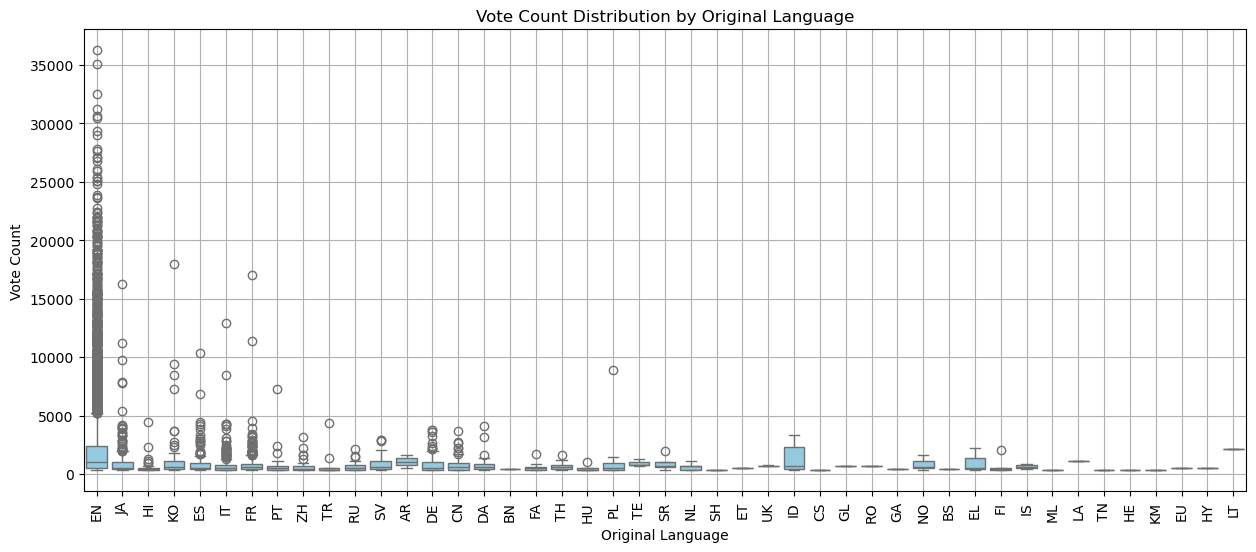

In [93]:
# Are highly voted movies skewed toward certain languages or time periods?
# Checking the distribution of vote_count by original_language
plt.figure(figsize=(15, 6))
sns.boxplot(data=movies, x='original_language', y='vote_count', color='skyblue')
plt.title('Vote Count Distribution by Original Language')
plt.xlabel('Original Language')
plt.ylabel('Vote Count')
plt.xticks(rotation=90)
plt.grid(True)


plt.savefig('vote_count_by_language.png')

plt.show()


##### Vote Count by Original Language
This graph illustrates audience engagement, measured by total vote count, across different movie original languages.

- **English Dominance:** Movies in English ('en') overwhelmingly dominate the total vote count, indicating a significantly wider reach and audience participation compared to all other languages.

- **Tiered Engagement:** Following English, languages like Japanese ('ja'), French ('fr'), Spanish ('es'), and German ('de') show the next highest levels of engagement, though their vote counts are substantially lower than English.

- **Implication:** The chart highlights that English-language films capture the vast majority of audience interaction in terms of voting, suggesting their broader market presence.



In [94]:
# Is there a "small sample size" problem? (Movies with few votes affecting average ratings.)
small_sample_movies = movies[movies['vote_count'] <= 300]
small_sample_movies[['title', 'vote_count', 'vote_average']].sort_values(by='vote_count', ascending=True)

,title,vote_count,vote_average
438,Invisible Life,300,7.900
8879,Torno indietro e cambio vita,300,5.512
8583,Beyond a Reasonable Doubt,300,5.677
8296,Sweet Virginia,300,5.803
8014,Dark Angel,300,5.899
7849,True History of the Kelly Gang,300,5.950
7225,Gemma Bovery,300,6.100
7048,The Stranger,300,6.152
6652,Loving Adults,300,6.252
6274,Kirikou and the Wild Beasts,300,6.300
